In [11]:
#import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn import tree

In [12]:
data = pd.read_csv('ecoli.csv')

In [29]:
X = data.values[:330, 0:2]
Y = data.values[:330, 7]

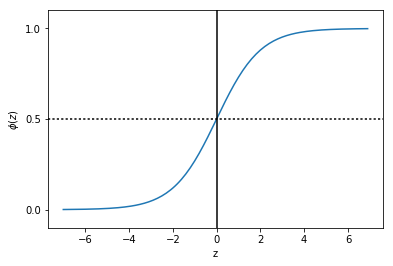

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
lr=LogisticRegression(C=0.001, random_state=10, tol=0.0001, max_iter=1000)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
        alpha=1.0, linewidth=1, marker='o',
        s=5500, label='test set')

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr.fit(X_train.astype(int), y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=lr,test_idx=range(0,333))
plt.xlabel('Absences')
plt.ylabel('Average marks')
plt.legend(loc='upper left')
plt.show()